# 차선 인식

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

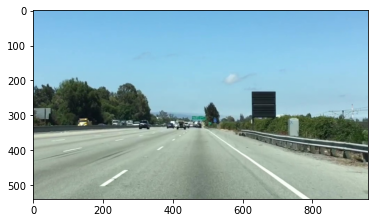

In [3]:
# using matplotlib
image = mpimg.imread("./data/test.jpg") # RGB
plt.imshow(image)

## Color Selection 

Color Picker Tool로 해당 이미지 색상의 RGB 코드값 얻어오기
https://annystudio.com/software/colorpicker/#download

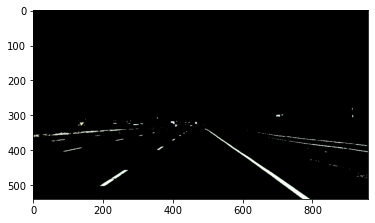

In [22]:
color_select = np.copy(image)

# todo
red_threshold = 200
green_threshold = 200
blue_threshold = 200

color_thresholds = ((image[:, :, 0] < red_threshold) | # R channel
                    (image[:, :, 1] < green_threshold) | # G channel
                    (image[:, :, 2] < blue_threshold)) # B channel

color_select[color_thresholds] = [0, 0, 0]
plt.imshow(color_select)

## Region Select

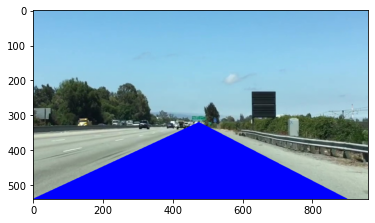

In [18]:
region_select = np.copy(image)

# todo
left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

pts = np.array([left_bottom, right_bottom, apex])
cv2.fillPoly(region_select, [pts], color=[0, 0, 255])
plt.imshow(region_select)

## Color and Region Selection

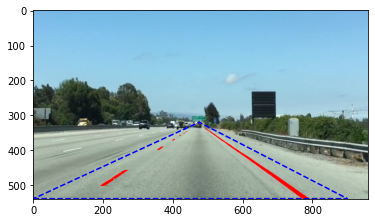

In [24]:
image = mpimg.imread("./data/test.jpg")
# 1. Color Selection 
color_select = np.copy(image)

red_threshold = 200
green_threshold = 200
blue_threshold = 200

color_thresholds = ((image[:, :, 0] < red_threshold) | # R channel
                    (image[:, :, 1] < green_threshold) | # G channel
                    (image[:, :, 2] < blue_threshold)) # B channel

color_select[color_thresholds] = [0, 0, 0]
plt.imshow(color_select)

# 2. Region Select
region_select = np.copy(image)

left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]

pts = np.array([left_bottom, right_bottom, apex])
cv2.fillPoly(region_select, [pts], color=[0, 0, 255])
plt.imshow(region_select)

# 3. Color + Region Select
lane_select = np.copy(image)

# color_thresholds : 차선(흰색)이 아닌 부분 True 설정
# region_thresholds : 관심영역(roi)에만 True 설정

region_threshold = ((region_select[:, :, 0] == 0 ) & # R channel
                    (region_select[:, :, 1] == 0 ) & # G channel
                    (region_select[:, :, 2] == 255)) # B channel


lane_select[~color_thresholds & region_threshold] = [255, 0, 0] # 흰색인부분과 관심영역에만 빨간색 표시

x = left_bottom[0], right_bottom[0], apex[0], left_bottom[0]
y = left_bottom[1], right_bottom[1], apex[1], left_bottom[1]
plt.plot(x, y, 'b--', 4)  # 관심영역을 점선으로 표시

plt.imshow(lane_select) 

## Canny Edge Detection

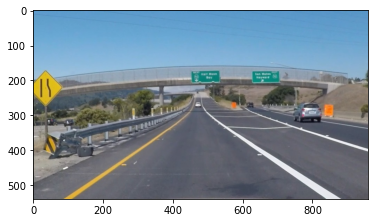

In [25]:
image = mpimg.imread("./data/exit-ramp.jpg")
plt.imshow(image)

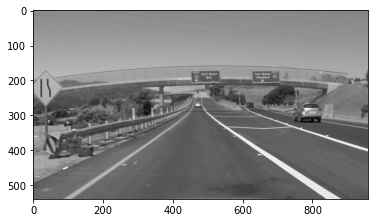

In [28]:
# step 1 : gray scale로 변한
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

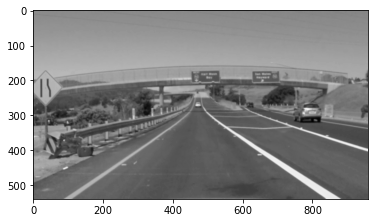

In [30]:
# step 2 : gaussian blurring (option)
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)
plt.imshow(blur_gray, cmap="gray")

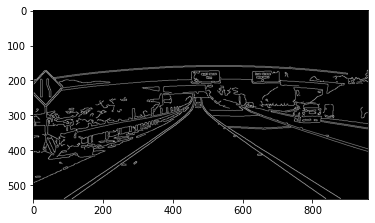

In [35]:
# step 3 : Edge detect
low_threshold = 50
high_threshold = 150  # low:high 의 비율 - 1:2 or 1:3

edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap="gray")

## ROI Selection

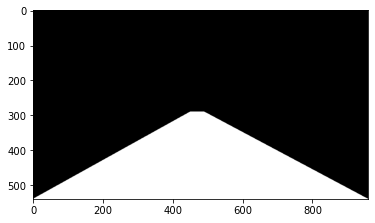

In [61]:
# step 4 : ROI Selection
pts = np.array([[(0, image.shape[0]-1), (450, 290), (490, 290), (image.shape[1]-1, image.shape[0]-1)]])

mask = np.zeros(edges.shape, edges.dtype)
cv2.fillPoly(mask, [pts], (255, 255, 255))
plt.imshow(mask, cmap="gray")

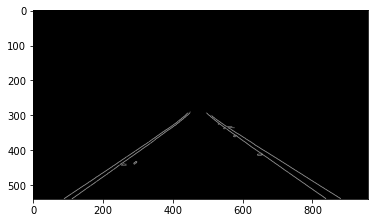

In [62]:
masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges, cmap="gray")

## Hough Transform

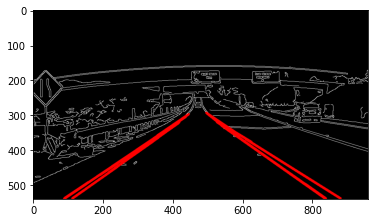

In [64]:
# step 5 : Line detect
rho = 1
theta = np.pi / 180
threshold = 30 # 직선으로 판단할 수 있는 허프공간에서의 교차점
minLineLength = 40
maxLineGap = 20

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold,
                       minLineLength = minLineLength,
                       maxLineGap = maxLineGap)

# color_edge = cv2.cvtColor(edges, cv2.COLOR2RGB) # line을 red로 그리기 위해 channel을 3차원으로
color_edge = np.dstack((edges, edges, edges)) # line을 red로 그리기 위해 channel을 3차원으로

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(color_edge, (x1, y1), (x2, y2), (255, 0, 0), 5)
    
plt.imshow(color_edge, cmap="gray")

## Pipeline 
- Canny Detection ->  ROI Selection -> Hough Transform 

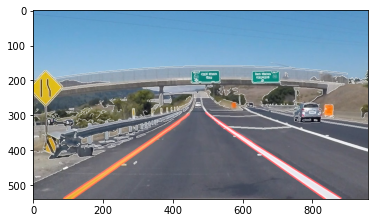

In [68]:
image = mpimg.imread("./data/exit-ramp.jpg")

# step 1 : gray scale로 변한
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# step 2 : gaussian blurring (option)
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

# step 3 : Edge detect
low_threshold = 50
high_threshold = 150  # low:high 의 비율 - 1:2 or 1:3

edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# step 4 : ROI Selection
pts = np.array([[(0, image.shape[0]-1), (450, 290), (490, 290), (image.shape[1]-1, image.shape[0]-1)]])

mask = np.zeros(edges.shape, edges.dtype)
cv2.fillPoly(mask, [pts], (255, 255, 255))

masked_edges = cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges, cmap="gray")

# step 5 : Line detect
rho = 1
theta = np.pi / 180
threshold = 30 # 직선으로 판단할 수 있는 허프공간에서의 교차점
minLineLength = 40
maxLineGap = 20

lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold,
                       minLineLength = minLineLength,
                       maxLineGap = maxLineGap)

# color_edge = cv2.cvtColor(edges, cv2.COLOR2RGB) # line을 red로 그리기 위해 channel을 3차원으로
color_edge = np.dstack((edges, edges, edges)) # line을 red로 그리기 위해 channel을 3차원으로

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(color_edge, (x1, y1), (x2, y2), (255, 0, 0), 5)
    

result = cv2.addWeighted(image, 1, color_edge, 0.8, 0)
plt.imshow(result)